<IPython.core.display.Javascript object>


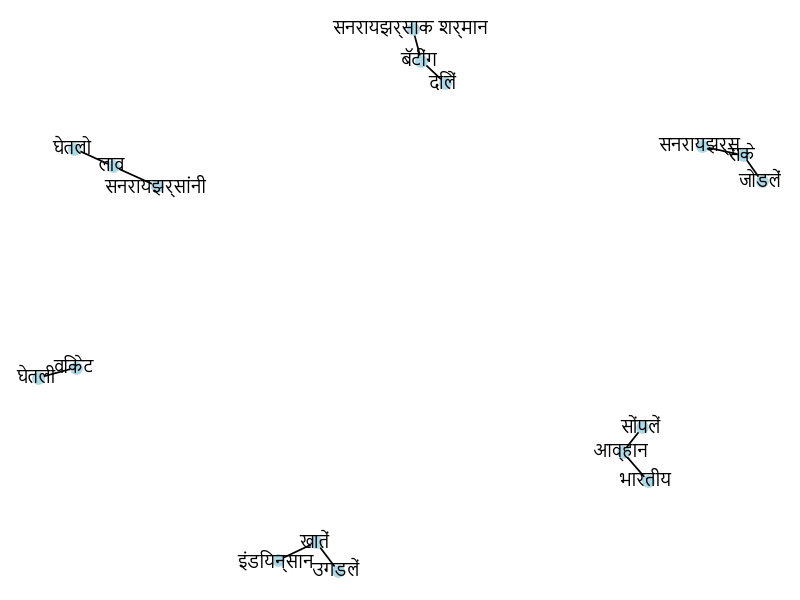

In [7]:
%matplotlib notebook
import codecs
import itertools
import re
import networkx as nx
import matplotlib.pyplot as pl
from matplotlib.font_manager import FontProperties


prop = FontProperties()
graph = nx.Graph()

labels = {}
each_one = []
list_of_sentences = []
subject_list = []
object_list = []
verb_list = []
newDict = {}


with codecs.open('sov.txt', encoding='utf-8') as f:
    text = f.read()
    sentences = re.split(r' *[\.\?!][\'"\)\]]* *', text)
    for stuff in sentences:
        list_of_sentences.append(stuff)
        
list_of_sentences.remove('\n')



f = open('sov_dict.txt', 'r')
for line in f:
    k,v = line.strip().split('/')
    newDict[k.strip().decode('utf-8')] = v.strip()
f.close()


for sentence in list_of_sentences:
    a = b = c = ""
    sentence_word_list = sentence.split()
    for word in sentence_word_list:
        if newDict[word] == 'N-NNP':
            a += word + " "
        if newDict[word] == 'N-NN':
            b += word + " "
        if newDict[word] == 'V-VM-VF':
            c += word + " "

    subject_list.append(a)
    object_list.append(b)
    verb_list.append(c)
    


for s in subject_list:
    if s is not "":
        graph.add_node(s)
        labels[s] = s

    
for o in object_list:
    if o is not "":
        graph.add_node(o)
        labels[b] = b
    
for v in verb_list:
    if v is not "":
        graph.add_node(v)
        labels[v] = v



for (s, o, v) in zip(subject_list, object_list, verb_list):
    if s and o is not "":
        graph.add_edge(s, o)
    if o and v is not "":
        graph.add_edge(o, v)

pos=nx.spring_layout(graph)
nx.draw(graph, with_labels = True, font_family = "Nirmala UI", node_size = 40, font_size = 10, node_color = "lightblue")

pl.show()